# Prediction by an actual quantum computer
- The ibm server is crowded. it will take long hours

In [1]:
%load_ext autoreload
%autoreload 2
from qcl.Qiskit.QiskitRegressor import QiskitRegressor
import numpy as np
from qcl.regressors.StandardQCLRegressor import StandardQCLRegressor
from qcl.gates.NeighborCNOTRotationGates import NeighborCNOTRotationGates 
from qcl.Encoders.WEncoder import WEncoder
from qcl.Encoders.XYEncoder import XYEncoder
from qcl.utils.solver import basinhopping_solver

import matplotlib.pyplot as plt

from qcl.testing.OneDimDataset import prepare_dataset,eval

loss 0.000000000524329


[0.04214608860257691,
 0.11640159721292903,
 0.1267359999999999,
 0.000576000000000001]

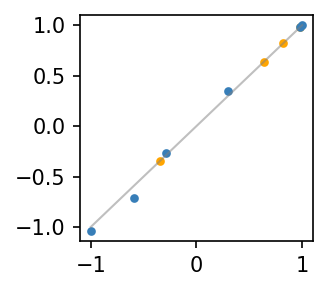

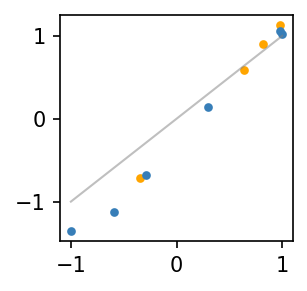

In [78]:
depth=4
n_qubit=2
n=10

mode="linear"
#mode="sin"
# normal simulation

def custom_basinhopping_solver(cost_func, theta_0, n_iter=0):
    return basinhopping_solver(cost_func, theta_0, n_iter=n_iter, verbose=True,xmax=1,xmin=-1)


tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y=prepare_dataset(n_all_record=n,mode=mode,plot=False)

st_model=StandardQCLRegressor(n_qubit=n_qubit,x_dim=1,
                            vqe_gates=NeighborCNOTRotationGates(n_qubit=n_qubit,depth=depth,add_y_gates=True),
                            encoder=XYEncoder(n_qubit=n_qubit),
                            solver=custom_basinhopping_solver,)

st_model.fit(tr_X,tr_y)

plt.figure(figsize=(2,2),dpi=150)
ax = plt.gca()
eval(ax,st_model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y)


# predict by sampling via Qiqskit (simulation)
# response becomes more different from qulacs when circuit becomes laeger


# copy trained data
model=QiskitRegressor(n_qubit=n_qubit,x_dim=1,depth=depth,shots=1000,theta_list=st_model.vqe_gates.get_params(),add_y_gates=True,flip=True)

#after copy
plt.figure(figsize=(2,2),dpi=150)
ax = plt.gca()
eval(ax,model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y,plot=True)


In [79]:
#compare circuits
from qulacsvis import circuit_drawer
circuit_drawer(st_model.vqe_gates.circuit)
print(model.cicuit.draw())
print(st_model.vqe_gates.get_params())



###############################################################################
>> 0
           ___     ___     ___     ___     ___     ___     ___             ___ 
          |pRX|   |pRY|   |pRX|   |CX |   |pRX|   |pRY|   |pRX|           |pRX|
----●-----|   |---|   |---|   |---|   |---|   |---|   |---|   |-----●-----|   |
    |     |___|   |___|   |___|   |___|   |___|   |___|   |___|     |     |___|
   _|_     ___     ___     ___      |      ___     ___     ___     _|_     ___ 
  |CX |   |pRX|   |pRY|   |pRX|     |     |pRX|   |pRY|   |pRX|   |CX |   |pRX|
--|   |---|   |---|   |---|   |-----●-----|   |---|   |---|   |---|   |---|   |
  |___|   |___|   |___|   |___|           |___|   |___|   |___|   |___|   |___|

###############################################################################
>> 1
    ___     ___     ___     ___     ___     ___   
   |pRY|   |pRX|   |CX |   |pRX|   |pRY|   |pRX|  
---|   |---|   |---|   |---|   |---|   |---|   |--
   |___|   |___|   |___|   |___|   

ibmqfactory.load_account:WARNING:2022-05-16 09:32:45,527: Credentials are already in use. The existing account in the session will be replaced.


initiated ibmq_quito
[0.63697016] 0.242
[0.98052684] 0.41200000000000003
[-0.3429835] -0.33000000000000007
[0.8206847] 0.20999999999999996
[0.9783136] 0.41800000000000004
[-0.58948333] -0.44199999999999995
[0.2982493] 0.008000000000000007
[-0.29041887] -0.266
[-1.] -0.6200000000000001
[1.] 0.552


[0.07723705218013419,
 0.06125483418083966,
 0.0576000000000001,
 0.01081600000000002]

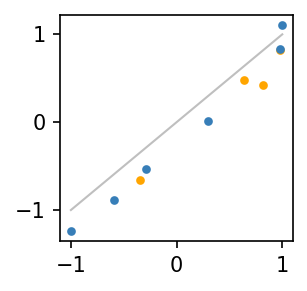

In [80]:
#predict actual quantum computing (takes a very long time!)
model.init_IBMQ(machine="ibmq_quito")
model.simulate=False

#predict
plt.figure(figsize=(2,2),dpi=150)
ax = plt.gca()
eval(ax,model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y,plot=True)